# Getting started with python

## Features of a programming language (coming from MATLAB)

In short, Python + Numpy + Scipy + Matplotlib is just as good as the basic Matlab.

![Diagram illustrating the differences between Python and Matlab in terms of their ecosystem. From http://www.pyzo.org/python_vs_matlab.html.](http://www.pyzo.org/_images/pythonvsmatlab.png)

Main points:
* MATLAB is okay for a quick result, but once your codebase grows, it becomes inherently impossible to maintain and to share because it is very difficult to modularize. In python, namespaces are very organized and it has an elegant object-oriented programming (OOP) paradigm.
* Python is free and opensource. This has some extra advantages: great online community, more developers available, easier to install across different OS. It is now a competition between the private sector versus the opensource community. Who do you think will win?
* Python is more lightweight. Less than 500MB with all great packages for scientific computing. Compare that to 15GB for matlab.
* The learning curve is a little steep, but it is worth it. Python is the scientific language of the present and the future. There is only [one page](https://www.mathworks.com/products/matlab/matlab-vs-python.html) in google that says MATLAB is better. (Guess by whom?)

### Features of Python language

Python language is:
* Very High-level
* General-purpose
* Object-oriented
* Imperative
* Procedural
* Reflective

#### Language vs. Implementation

There is a difference between a language and the implementation of a language. Most people, including myself, confuse both. The language is the definition of the grammar in which you write the code, whereas the implementation is what "runs" the code. For python, there is a reference implementation, called [CPython](https://en.wikipedia.org/wiki/CPython). 

The implementation defines whether your language will be _interpreted_ or _compiled_. CPython is an [interpreter loop compiled in _C_](https://stackoverflow.com/questions/17130975/python-vs-cpython). It is a program compiled in _C_ that runs Python code almost line by line. That is why, in the code below, the list comprehention runs a little bit faster than append.

In [ ]:
N = 1000000

def generate_list(N):
    x = list()
    for i in range(N):
        x.append(i ** 2)
    return x
print("populating x via list append:")
%timeit x = generate_list(N)  # Standard python population and computing


print("populating x via list comprehension:")
%timeit x = [i ** 2 for i in range(N)]  # The population subroutine is optimized


print("populating x via numpy:")
# With numpy
import numpy as np
%timeit x = np.arange(N) ** 2  # This is run in C bytecode

### Python is reflective

In computer science, reflection is the ability of a computer program to examine, introspect, and modify its own structure and behavior at runtime. [wiki](https://en.wikipedia.org/wiki/Reflection_(computer_programming%29)

### MATLAB is a scripting language, python is more than that.

Every scripting language is a programing language, but not the other way around. To be a programming language, your code requires a compilation step.  Python sits in both camps: Python is widely used without a compilation step, but the main implementation (CPython) does that by compiling to bytecode on-the-fly and then running the bytecode in a VM, and it can write that bytecode out to files (`.pyc`, `.pyo`) for use without recompiling.

Compiled code is useful from a practical perspective. Consider the following code:

In [ ]:
def apply_my_function_to_array(arr):
    return [my_function(element) for element in arr]  # or map(my_function, arr), which is the standard python implementation

def my_function(a):
    return a * 2  # just doubles the input

arr = range(5000)
%time doubled_arr = map(my_function, arr)
%time doubled_arr = list(map(my_function, arr))
%time doubled_arr = apply_my_function_to_array(arr)

print(doubled_arr[2])

Notice how I was able to define `apply_my_function_to_array` **before** `my_function`! This is because code inside functions are just declared, not executed. The first time `my_function` is called is when you actually need to get the results. That means you can write entire programs high-level code, even compile them, and execute them on a need basis.

Bonus: notice the speed difference between the second and the last line. Can somebody explain why? Hint below.

In [ ]:
def my_function(a):
    raise RuntimeError("I was called.")

arr = range(5000)

mapped_arr = map(my_function, arr)

# No errors until here
mapped_arr = list(mapped_arr)

### Duck typing
> "If it walks like a duck and it quacks like a duck, then it must be a duck."
> –someone

Taken from wikipedia:

In [ ]:
class Duck:
    def fly(self):
        print("Duck flying")

class Parrot:
    def fly(self):
        print("Parrot flying")

class Airplane:
    def fly(self):
        print("Airplane flying")

class Whale:
    def swim(self):
        print("Whale swimming")

def lift_off(entity):
    entity.fly()

duck = Duck()
parrot = Parrot()
airplane = Airplane()
whale = Whale()

lift_off(duck) # prints `Duck flying`
lift_off(parrot) # prints `Parrot flying`
lift_off(airplane) # prints `Airplane flying`
lift_off(whale) # Throws the error `'Whale' object has no attribute 'fly'

### Breaking the ice

Let's run the equivalent code in python from MATLAB:

```matlab
x = linspace(0,2*pi,100);
y = sin(x);
plot(x,y)
ylabel('sin(x)')
xlabel('x') 
```

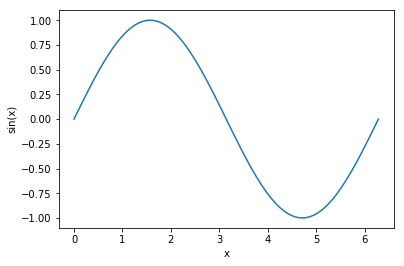

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.figure()
plt.plot(x,y)
plt.ylabel('sin(x)')
plt.xlabel('x')
plt.show()

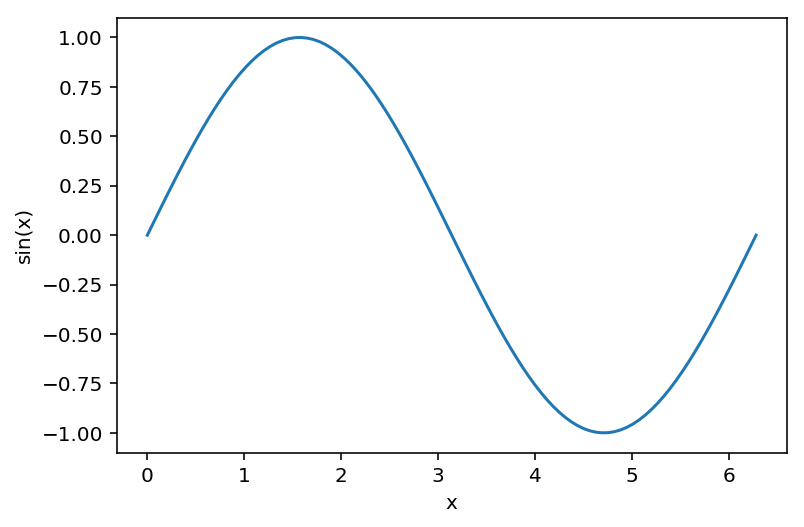

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.ylabel('sin(x)')
plt.xlabel('x')
plt.show()

### Using latex processing in the labels.

More information in https://matplotlib.org/users/usetex.html

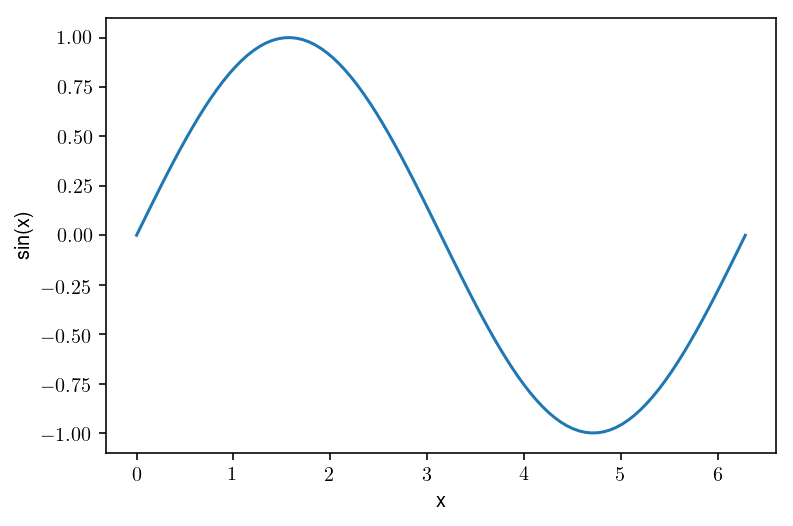

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.ylabel(r'sin(x)')
plt.xlabel('x')
plt.show()

### Saving to PDF
More information: https://matplotlib.org/api/backend_pdf_api.html#matplotlib.backends.backend_pdf.PdfPages

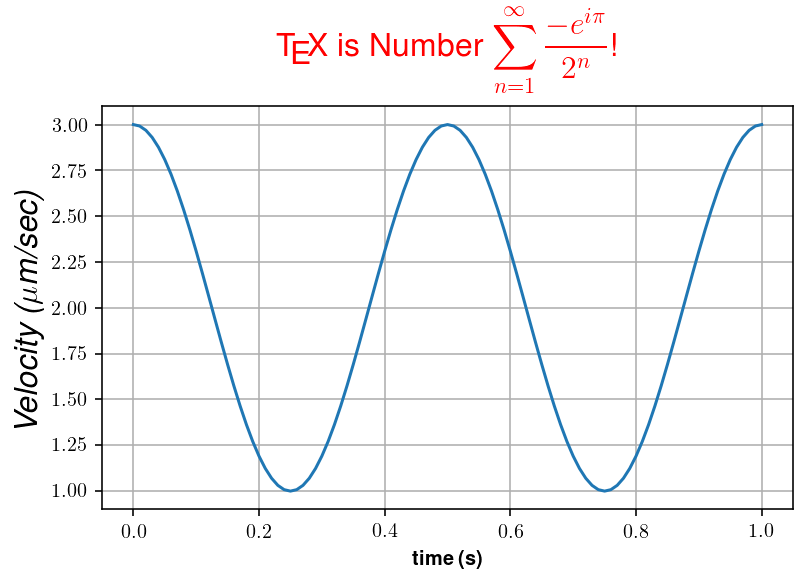

In [21]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime

fig = plt.figure(1, figsize=(6, 4))
ax = plt.axes([0.1, 0.1, 0.8, 0.7])
t = np.arange(0.0, 1.0 + 0.01, 0.01)
s = np.cos(2*2*np.pi*t) + 2
plt.plot(t, s)

plt.xlabel(r'\textbf{time (s)}')
plt.ylabel(r'\textit{Velocity ($\mu$m/sec)}', fontsize=16)
plt.title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
          r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
plt.grid(True)

metadata = {'Author': 'Thomas Ferreira de Lima',
            'CreationDate': datetime.datetime(2018, 3, 2, 0, 0),
            'Creator': 'matplotlib 2.1.2, http://matplotlib.org',
            'Keywords': 'PdfPages multipage keywords author title subject',
            'ModDate': datetime.datetime(2018, 3, 2, 22, 24, 24, 61965),
            'Producer': 'matplotlib pdf backend 2.1.2',
            'Subject': 'How to create a pdf file from a figure and set its metadata',
            'Title': 'Latex plot'}
with PdfPages('foo.pdf') as pdf:
    pdf.savefig(fig)  # In the saved PDF, you will notice that the margins are terrible
    # control metadata
    d = pdf.infodict()
    d.update(metadata)

#use this trick:
#plt.tight_layout()
with PdfPages('foo-tight.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')  # In the saved PDF, you will notice that the margins are terrible
    d = pdf.infodict()
    d.update(metadata)
    
plt.show()

In [ ]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

In [ ]:
ϕ = 2

In [ ]:
ϕ